adaptation of p. 251-255 of "Introduction to Statistical Learning with Applications in R" by Gareth James, Daniela Witten, Trevor Hastie and Robert Tibshirani. Adapted by R. Jordan Crouser at Smith College for SDS293: Machine Learning (Spring 2016).

# LS vs Ridge Regression vs the Lasso

In [25]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [26]:
from sklearn.datasets import load_boston
import pandas as pd

names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df = pd.read_csv(('housing.csv'), delim_whitespace=True, names=names)

df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [27]:
y = df.MEDV
X = df.drop(['MEDV'], axis=1)
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33


In [28]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

## Ridge Regression

In [29]:
alphas = 10**np.linspace(10,-2,100)*0.5
alphas

array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+07, 1.07721735e+07, 8.14875417e+06,
       6.16423370e+06, 4.66301673e+06, 3.52740116e+06, 2.66834962e+06,
       2.01850863e+06, 1.52692775e+06, 1.15506485e+06, 8.73764200e+05,
       6.60970574e+05, 5.00000000e+05, 3.78231664e+05, 2.86118383e+05,
       2.16438064e+05, 1.63727458e+05, 1.23853818e+05, 9.36908711e+04,
       7.08737081e+04, 5.36133611e+04, 4.05565415e+04, 3.06795364e+04,
       2.32079442e+04, 1.75559587e+04, 1.32804389e+04, 1.00461650e+04,
       7.59955541e+03, 5.74878498e+03, 4.34874501e+03, 3.28966612e+03,
       2.48851178e+03, 1.88246790e+03, 1.42401793e+03, 1.07721735e+03,
      

In [30]:
ridge = Ridge(normalize = True)
coefs = []

for a in alphas:
    ridge.set_params(alpha = a)
    ridge.fit(X, y)
    coefs.append(ridge.coef_)
    
np.shape(coefs)
coefs

[array([-8.30380555e-11,  2.84279988e-11, -1.29698011e-10,  1.26923142e-09,
        -6.78321099e-09,  1.82042180e-09, -2.46325442e-11,  2.18322603e-10,
        -8.06190790e-11, -5.11361989e-12, -4.31435059e-10,  6.71861202e-12,
        -1.90009871e-10]),
 array([-1.09771422e-10,  3.75801414e-11, -1.71453137e-10,  1.67784924e-09,
        -8.96700573e-09,  2.40649048e-09, -3.25627738e-11,  2.88609632e-10,
        -1.06573678e-10, -6.75990455e-12, -5.70331757e-10,  8.88160968e-12,
        -2.51181866e-10]),
 array([-1.45111360e-10,  4.96787352e-11, -2.26650957e-10,  2.21801796e-09,
        -1.18538538e-08,  3.18123879e-09, -4.30460705e-11,  3.81524948e-10,
        -1.40884130e-10, -8.93619598e-12, -7.53945018e-10,  1.17409653e-11,
        -3.32047645e-10]),
 array([-1.91828678e-10,  6.56723642e-11, -2.99619226e-10,  2.93208920e-09,
        -1.56700971e-08,  4.20541045e-09, -5.69043719e-11,  5.04353527e-10,
        -1.86240528e-10, -1.18131252e-11, -9.96670942e-10,  1.55208651e-11,
       

Text(0, 0.5, 'weights')

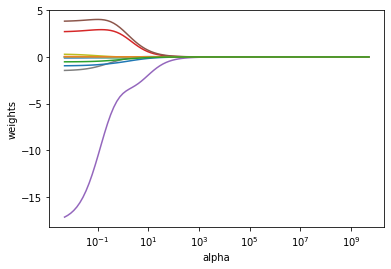

In [31]:
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

In [32]:
# Split data into training and test sets
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=43)

In [33]:
ridge2 = Ridge(alpha = 4, normalize = True)
ridge2.fit(X_train, y_train)             # Fit a ridge regression on the training data
pred2 = ridge2.predict(X_test)           # Use this model to predict the test data
print(pd.Series(ridge2.coef_, index = X.columns)) # Print coefficients
print("Average MEDV:", np.mean(y_test))
print("MAE:",mean_absolute_error(y_test, pred2))          # Calculate the test MAE
print("MSE:",mean_squared_error(y_test, pred2))          # Calculate the test MSE
print("MAPE:",mean_absolute_percentage_error(y_test,pred2),"%") # Calculate the test MAPE
print("R2Score:",r2_score(y_test, pred2))          # Calculate the test R2

CRIM      -0.039768
ZN         0.012939
INDUS     -0.059757
CHAS       1.148775
NOX       -3.358405
RM         1.332710
AGE       -0.010687
DIS        0.017108
RAD       -0.030200
TAX       -0.002455
PTRATIO   -0.278175
B          0.004021
LSTAT     -0.133982
dtype: float64
Average MEDV: 22.269565217391307
MAE: 4.7318889987660535
MSE: 47.509209244430565
MAPE: 25.041099189912824 %
R2Score: 0.43576279211905544


In [34]:
from sklearn.metrics import r2_score
ridge3 = Ridge(alpha = 10**10, normalize = True)
ridge3.fit(X_train, y_train)             # Fit a ridge regression on the training data
pred3 = ridge3.predict(X_test)           # Use this model to predict the test data
#print(pd.Series(ridge3.coef_, index = X.columns)) # Print coefficients

print("Average Salary:", np.mean(y_test))
print("MAE:",mean_absolute_error(y_test, pred3))          # Calculate the test MAE
print("MSE:",mean_squared_error(y_test, pred3))          # Calculate the test MSE
print("MAPE:",mean_absolute_percentage_error(y_test,pred3),"%") # Calculate the test MAPE
print("R2Score:",r2_score(y_test, pred3))          # Calculate the test R2

Average Salary: 22.269565217391307
MAE: 6.563348901991128
MSE: 84.47795680419348
MAPE: 38.565834433295635 %
R2Score: -0.003291935032005311


Using RidgeCV

In [36]:
ridgecv = RidgeCV(alphas = alphas, scoring = 'neg_mean_squared_error', normalize = True)
ridgecv.fit(X_train, y_train)
ridgecv.alpha_

pred11 = ridgecv.predict(X_test)            # Use this model to predict the test data
print(pd.Series(ridge2.coef_, index = X.columns)) # Print coefficients
print("Average Salary:", np.mean(y_test))
print("MAE:",mean_absolute_error(y_test, pred11))          # Calculate the test MAE
print("MSE:",mean_squared_error(y_test, pred11))          # Calculate the test MSE
print("MAPE:",mean_absolute_percentage_error(y_test,pred11),"%") # Calculate the test MAPE
print("R2Score:",r2_score(y_test, pred11))          # Calculate the test R2
ridgecv.alpha_

CRIM       -0.022225
ZN          0.029062
INDUS       0.055297
CHAS        1.649471
NOX       -18.443433
RM          3.470573
AGE         0.015169
DIS        -1.126127
RAD         0.313823
TAX        -0.014110
PTRATIO    -1.117602
B           0.010337
LSTAT      -0.619982
dtype: float64
Average Salary: 22.269565217391307
MAE: 3.339791843177223
MSE: 24.87083260458091
MAPE: 17.183654393188217 %
R2Score: 0.7046246534164706


0.03527401155359316

In [37]:
ridge4 = Ridge(alpha = ridgecv.alpha_, normalize = True)
ridge4.fit(X_train, y_train)
pred4 = ridge4.predict(X_test)
mean_squared_error(y_test, ridge4.predict(X_test))


24.870832604581963

In [38]:
ridge4.fit(X, y)
pd.Series(ridge4.coef_, index = X.columns)

CRIM       -0.095410
ZN          0.037889
INDUS      -0.019015
CHAS        2.837895
NOX       -14.350346
RM          3.955089
AGE        -0.002164
DIS        -1.278671
RAD         0.207283
TAX        -0.007828
PTRATIO    -0.897622
B           0.009215
LSTAT      -0.496485
dtype: float64

## Least Square

Least square is the same with ridge with alpha 0

In [53]:
ridge2 = Ridge(alpha = 0, normalize = True)
ridge2.fit(X_train, y_train)             # Fit a ridge regression on the training data
pred = ridge2.predict(X_test)            # Use this model to predict the test data
print(pd.Series(ridge2.coef_, index = X.columns)) # Print coefficients
print("Average Salary:", np.mean(y_test))
print("MAE:",mean_absolute_error(y_test, pred))          # Calculate the test MAE
print("MSE:",mean_squared_error(y_test, pred))          # Calculate the test MSE
print("MAPE:",mean_absolute_percentage_error(y_test,pred),"%") # Calculate the test MAPE
print("R2Score:",r2_score(y_test, pred))          # Calculate the test R2

CRIM       -0.022225
ZN          0.029062
INDUS       0.055297
CHAS        1.649471
NOX       -18.443433
RM          3.470573
AGE         0.015169
DIS        -1.126127
RAD         0.313823
TAX        -0.014110
PTRATIO    -1.117602
B           0.010337
LSTAT      -0.619982
dtype: float64
Average Salary: 22.269565217391307
MAE: 3.413498080266391
MSE: 25.01499362925367
MAPE: 17.63952544624937 %
R2Score: 0.7029125429574621


## The Lasso

Text(0, 0.5, 'weights')

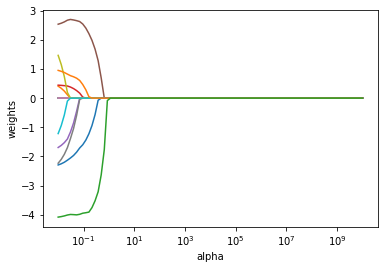

In [39]:
lasso = Lasso(max_iter = 10000, normalize = True)
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(scale(X_train), y_train)
    coefs.append(lasso.coef_)
    
ax = plt.gca()
ax.plot(alphas*2, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

Using LassoCV

In [49]:
lassocv = LassoCV(alphas = None, cv = 10, max_iter = 100000, normalize = True)
lassocv.fit(X_train, y_train)

lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(X_train, y_train)
mean_squared_error(y_test, lasso.predict(X_test))
pred7=lasso.predict(X_test)
print("Average MEDV:", np.mean(y_test))
print("MAE:",mean_absolute_error(y_test, pred7))          # Calculate the test MAE
print("MSE:",mean_squared_error(y_test, pred7))          # Calculate the test MSE
print("MAPE:",mean_absolute_percentage_error(y_test,pred7),"%") # Calculate the test MAPE
print("R2Score:",r2_score(y_test, pred7))          # Calculate the test R2

Average MEDV: 22.269565217391307
MAE: 3.3856253038511945
MSE: 25.164468239278865
MAPE: 17.541685655493165 %
R2Score: 0.7011373263636479


Features and the coefficients

In [41]:
# Some of the coefficients are now reduced to exactly zero.
pd.Series(lasso.coef_, index=X.columns)

CRIM       -0.003053
ZN          0.021100
INDUS       0.000000
CHAS        1.715723
NOX       -15.476863
RM          3.574306
AGE         0.005914
DIS        -1.096350
RAD         0.219344
TAX        -0.009535
PTRATIO    -1.064630
B           0.010236
LSTAT      -0.604650
dtype: float64

In [50]:
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV
elas = ElasticNet(alpha=0.01)
elascv = ElasticNetCV(cv=10, random_state=0)
elascv.fit(X_train, y_train)

elas.set_params(alpha=elascv.alpha_,l1_ratio=elascv.l1_ratio)
elas.fit(X_train, y_train)

pred10=elas.predict(X_test)
print("Average MEDV:", np.mean(y_test))
print("MAE:",mean_absolute_error(y_test, pred10))          # Calculate the test MAE
print("MSE:",mean_squared_error(y_test, pred10))          # Calculate the test MSE
print("MAPE:",mean_absolute_percentage_error(y_test,pred10),"%") # Calculate the test MAPE
print("R2Score:",r2_score(y_test, pred10))          # Calculate the test R2
elascv.l1_ratio

Average MEDV: 22.269565217391307
MAE: 3.9002310943646363
MSE: 32.31818711225778
MAPE: 19.52057148698419 %
R2Score: 0.6161770749292794


0.5

In [43]:
from sklearn.feature_selection import SelectFromModel
sel_model = SelectFromModel(lassocv, prefit=True)
sel_model.get_support()

array([ True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True])

In [44]:
selected_feat = X_train.columns[(sel_model.get_support())]
print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))


total features: 13
selected features: 12


In [45]:
X_train_selected = sel_model.transform(X_train.fillna(0))
X_test_selected = sel_model.transform(X_test.fillna(0))
X_train_selected.shape, X_test_selected.shape

((253, 12), (253, 12))

In [46]:
lassocv = LassoCV(alphas = None, cv = 10, max_iter = 100000, normalize = True)
lassocv.fit(X_train_selected, y_train)

lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(X_train_selected, y_train)
pred8=lasso.predict(X_test_selected)
print("Average Salary:", np.mean(y_test))
print("MAE:",mean_absolute_error(y_test, pred8))          # Calculate the test MAE
print("MSE:",mean_squared_error(y_test, pred8))          # Calculate the test MSE
print("MAPE:",mean_absolute_percentage_error(y_test,pred8),"%") # Calculate the test MAPE
print("R2Score:",r2_score(y_test, pred8))          # Calculate the test R2

Average Salary: 22.269565217391307
MAE: 3.3905899408369944
MSE: 25.0549276731049
MAPE: 17.53538159654674 %
R2Score: 0.7024382712581357


In [47]:
ridgecv = RidgeCV(alphas = alphas, scoring = 'neg_mean_squared_error', normalize = True)
ridgecv.fit(X_train_selected, y_train)

ridge.set_params(alpha=ridgecv.alpha_)
ridge.fit(X_train_selected, y_train)
pred9=ridge.predict(X_test_selected)
print("Average Salary:", np.mean(y_test))
print("MAE:",mean_absolute_error(y_test, pred9))          # Calculate the test MAE
print("MSE:",mean_squared_error(y_test, pred9))          # Calculate the test MSE
print("MAPE:",mean_absolute_percentage_error(y_test,pred9),"%") # Calculate the test MAPE
print("R2Score:",r2_score(y_test, pred9))          # Calculate the test R2

Average Salary: 22.269565217391307
MAE: 3.339723288060955
MSE: 24.870908184212542
MAPE: 17.183187211510038 %
R2Score: 0.7046237558043866


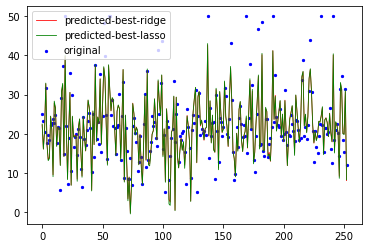

In [48]:
x_ax = range(len(X_test))
plt.scatter(x_ax, y_test, s=5, color="blue", label="original")
plt.plot(x_ax, pred11, lw=0.8, color="red", label="predicted-best-ridge")
plt.plot(x_ax, pred8, lw=0.8, color="green", label="predicted-best-lasso")
plt.legend()
plt.show()

# Conclusion

Bentuk terbaik adalah RidgeCV dengan MSE terkecil 24.87 lalu Least Square 25.014 Lasso 25.16.

Ada fitur-fitur yang dihilangkan oleh Lasso yaitu INDUS.